In [1]:
import nmresearch as nmr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 9
ham = nmr.Hamiltonian(N)

In [3]:
ham.H_cs_scrambling()

In [4]:
operator =  nmr.PauliMatrix(N)
sigz = (1/2**(N/2))*nmr.lanczos.op_basis.vec(operator.sigmaZ(0))

In [5]:
solver = nmr.Lanczos(ham.to_super(),sigz)

In [6]:
solver.compute_lanczos_fast()

Computation took 5.157589900016319 sec, after 50 iterations.


In [7]:
signal_fast = solver.auto_correlation(times=np.arange(0,5,.1))

C:\Users\awsta\Documents\qeg-workspace\qeg-env\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\awsta\Documents\qeg-workspace\qeg-env\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


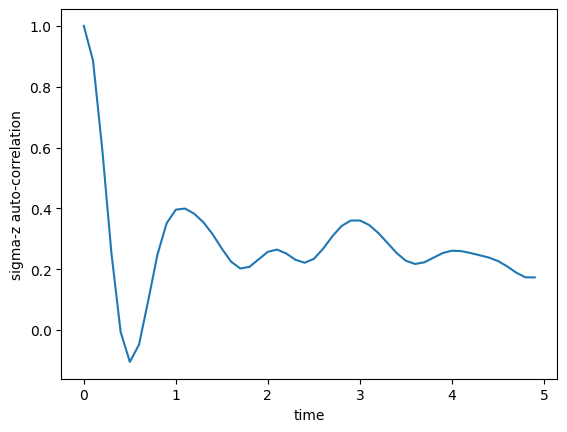

In [8]:
plt.plot(np.arange(0,5,.1),signal_fast)
plt.xlabel("time")
plt.ylabel("sigma-z auto-correlation")
plt.show()

In [9]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [10]:
time_vec = np.arange(0,5,.05)
ensemble_signal = np.zeros(len(time_vec))
num_trials = 300

In [11]:
for idx in range(num_trials):
    ham.clear()
    ham.H_cs_scrambling()
    solver = nmr.Lanczos(ham.to_super(),sigz)
    if (idx+1) % 30 == 0:
        print(str(idx/num_trials * 100) + "% done")
    with HiddenPrints():
        solver.compute_lanczos_fast()

    ensemble_signal = ensemble_signal + (1/num_trials) * solver.auto_correlation(time_vec)
    del solver

9.666666666666666% done
19.666666666666664% done
29.666666666666668% done
39.666666666666664% done
49.666666666666664% done
59.66666666666667% done
69.66666666666667% done
79.66666666666666% done
89.66666666666666% done
99.66666666666667% done


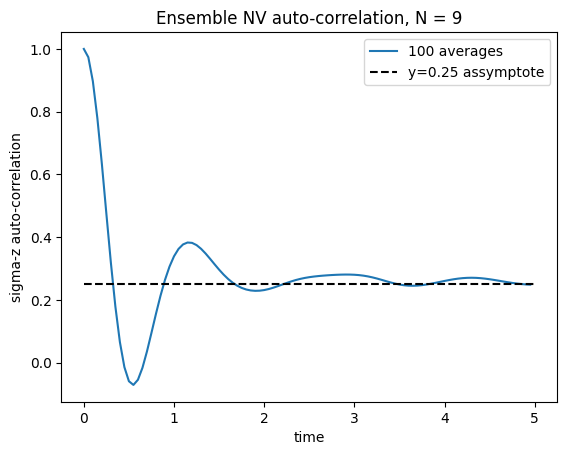

In [12]:
plt.plot(time_vec, ensemble_signal,label="100 averages")
plt.hlines(0.25,0,5,'k','dashed', label="y=0.25 assymptote")
plt.xlabel("time")
plt.ylabel("sigma-z auto-correlation")
plt.title("Ensemble NV auto-correlation, N = " + str(N))
plt.legend()
plt.show()